In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

scale = 1;
fsize = (12*scale, 9*scale)
mpl.rcParams['axes.titlesize'] = 26*scale
mpl.rcParams['legend.fontsize'] = 22*scale
mpl.rcParams['axes.labelsize'] = 20*scale
mpl.rcParams['lines.linewidth'] = 2*scale
mpl.rcParams['lines.markersize'] = 16*scale
mpl.rcParams['xtick.labelsize'] = 18*scale
mpl.rcParams['ytick.labelsize'] = 18*scale

### Plotting and forward difference (derivative) error example

Suppose we wish to compute $f'(x_0)$ using the forward difference

$$ D(f,h) := \frac{f(x_0 + h) - f(x_0)}{h}.$$

The error has two parts: 
* A *truncation error* from the Taylor series:
$$ f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2}f''(\eta(h)) + \cdots$$
It follows that
$$ \text{trunc. err.} \approx \frac{Ch}{2}$$
where constant $C$ depends on $h$ (precisely, $\eta$ is a point between $x_0$ and $x_0 + h$.

* A *representation (rounding) error* from computing $f$. Assuming that $f$ is actually computed as $\tilde f$ where
\[
    \tilde f = f + \tex{err}, \quad |\text{err}| < \delta
\]
we have that the rounding error is bounded as follows:
$$ \text{rounding err.} \leq \frac{\delta + \delta}{h} = \frac{2\delta}{h}.$$ 
The standard functions (like $e^{2x}$) here are computed up to `machine epsilon', $\delta \approx 1.2 \times 10^{-16}$.

### A numerical test...

Here we test the approximation for $f(x) = e^{2x}$ at $x_0 = 0$. 

A log-log plot of the error $E(h)$ vs. $h$ shows the rate of convergence; an error $Ch^p$ has a slope of $p$ on the plot. 

Obviously we want $p > 0$ so the error $\to 0$ as $h\to 0$, but rounding error spoils it when $h$ is small.

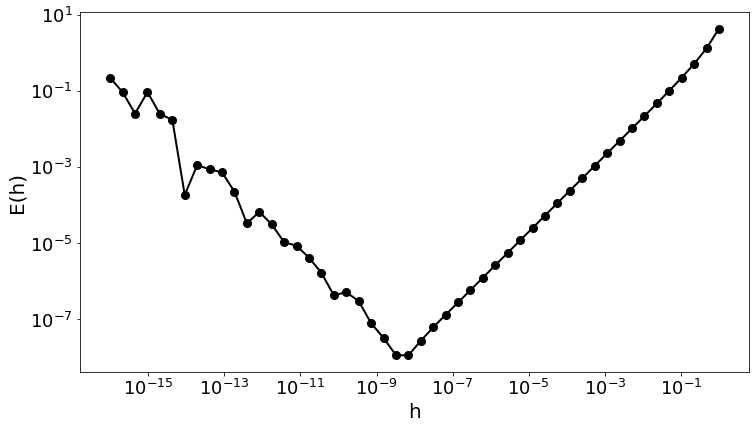

In [2]:
def fd_approx(f,h,x0):
    return (f(x0+h)-f(x0))/h

def fd_data(f,x0,p,q,num=20):
    '''generates h vs. D(f,h), with log10-spaced h's from 10^(p) to 10^(q) '''
    hvals = [10**(p + (k/(num-1))*(q-p)) for k in range(0,num)]
    dvals = [fd_approx(f,h,x0) for h in hvals]
    return hvals,dvals
def func(x):
    return np.exp(2*x)

def max_error(approx,lim): #max error; list 'approx' vs. limit 'lim'
    return [abs(v - lim) for v in approx]

x0 = 0
exact = 2.0 # exact value of f'(0)

hvals,dvals = fd_data(func,x0,-16,0,num=50)
derr = max_error(dvals,exact)

plt.figure(1,figsize=fsize)
plt.loglog(hvals,derr,'.-k') 
plt.gca().set_aspect('equal') #make axes have equal scales 
plt.xlabel('h')
plt.ylabel('E(h)');

### Inferring the rate from numerical data
For smaller values, rounding error dominates - and the total error increases as $h$ shrinks!

Now suppose we want to infer the slopes from the data. A linear fit to the two regions
should find that the slopes are about -1 and 1. This is shown below. 

The numerical data confirms the theory, which predicted that

$$E(h) \leq \frac{Ch}{2} + \frac{2\delta}{h}.$$

The truncation error (scaling like $O(h)$) dominates until $h \approx 10^{-8}$.  
For smaller values, rounding error dominates - and the total error increases as $h$ shrinks!

The error is minimized at a certain value of $h$; by finding the minimum of the bound, you can predict the value.

 
Slope (h < 1.0e-08): -0.93
Slope (h > 1.0e-08):  1.02



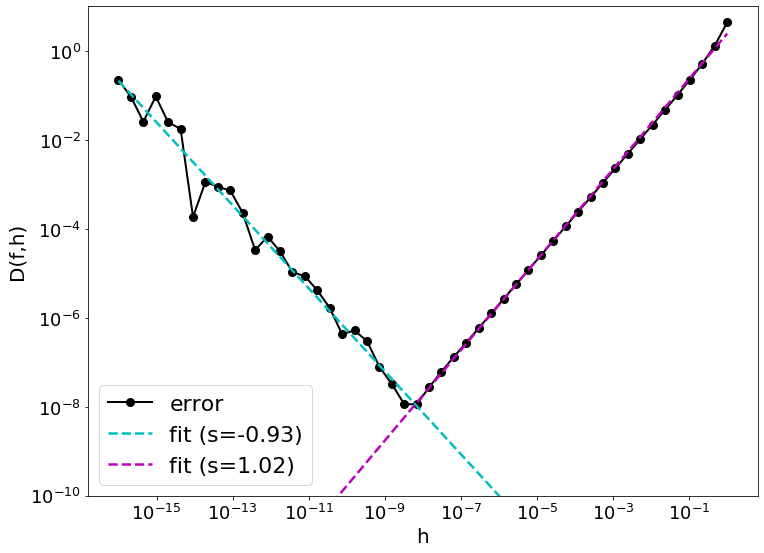

In [3]:
def loglog_fit(x,y):
    ''' quick (not efficient) routine to compute a fit for data Y ?= C*X^p 
        by fitting a line to log(Y) = p*log(X) + C
    '''  
    lx = np.log(x) # use numpy's linear fitting code here
    ly = np.log(y)
    coeffs = np.polyfit(lx,ly,1)
    return coeffs

def loglog_val(coeffs,x):
    '''evaluates the fit defined by coeffs at x-values (Y = C*X^p)'''
    return [np.exp(coeffs[1] + coeffs[0]*np.log(v)) for v in x]

i1 = 0; #find the middle point (manually, not by seeking the min.)
cutoff = 1e-8;
while hvals[i1] < cutoff:
    i1 += 1
    
c1 = loglog_fit(hvals[:i1], derr[:i1]) #fit to each half
c2 = loglog_fit(hvals[i1:], derr[i1:])

fit1 = loglog_val(c1,hvals) #evaluate fits
fit2 = loglog_val(c2,hvals)

print(' \nSlope (h < {:.1e}): {:.2f}'.format(cutoff,c1[0]))
print('Slope (h > {:.1e}):  {:.2f}\n'.format(cutoff,c2[0]))

#plotting...
plt.figure(1,figsize=fsize)
plt.loglog(hvals,derr,'.-k')
plt.loglog(hvals,fit1,'--c',hvals,fit2,'--m',linewidth=2.5)
plt.xlabel('h')
plt.ylabel('D(f,h)')
plt.legend(['error','fit (s=-0.93)','fit (s=1.02)'])
plt.ylim([1e-10, 1e1]);